# Learning objectives


# Setup environment

In [ ]:
#@formatter:off
!python -c "import monai" || pip install -qU "monai[ignite, nibabel, torchvision, tqdm]==1.2.0"
#@formatter:on

# Verify your Configuration

Execute the following cell to check MONAI's configuration using MONAI's `print_config()`.

In [ ]:
from monai.config import print_config

print_config()

# Download dataset

In this exercise, we will be using the Medical Decathlon Spleen data.

In [2]:
import os
from monai.apps import download_and_extract
from monai.utils import set_determinism
from pathlib import Path

set_determinism(seed=0)

directory = "./Data/msd_spleen"
resource = "https://msd-for-monai.s3-us-west-2.amazonaws.com/Task09_Spleen.tar"
md5 = "410d4a301da4e5b2f6f86ec3ddba524e"

compressed_file = os.path.join(directory, "Task09_Spleen.tar")
data_dir = os.path.join(directory, "Task09_Spleen")
if not os.path.exists(data_dir):
    download_and_extract(resource, compressed_file, directory, md5)

train_images = sorted(Path(data_dir, "imagesTr").glob("spleen*.nii.gz"))
train_labels = sorted(Path(data_dir, "labelsTr").glob("spleen*.nii.gz"))
data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]
train_data_dicts, val_data_dicts = data_dicts[:-9], data_dicts[-9:]

# Preprocessing transform

1. Create a preprocessing transform which : 
    - Loads the images and labels
    - Ensures channel first
    - Changes orientation to LPI
    - Resizes the output to (96, 96, 96)
    - Scales the intensity between 0-1 of the image
    - Applies a random affine transform with prob 1.0
2. Test the pre transform on the first image

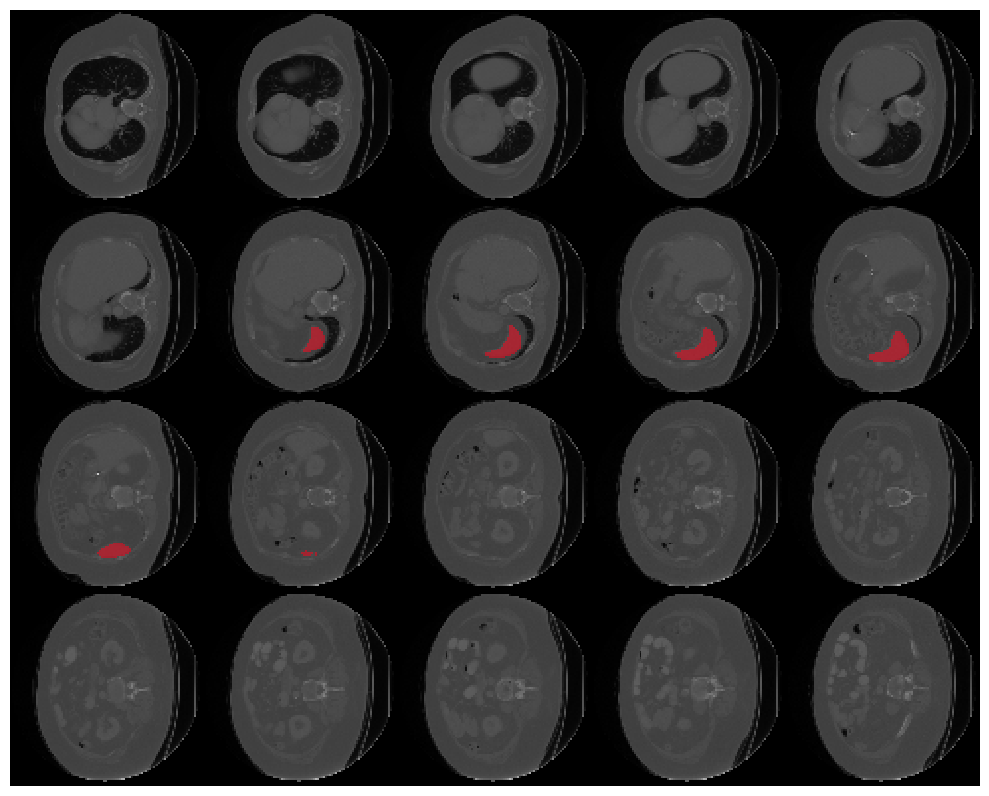

In [61]:
%matplotlib inline
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, Orientationd, Resized, ScaleIntensityd
from monai.visualize import matshow3d, blend_images

preprocessing = Compose([fixMe])

data = preprocessing(train_data_dicts[0])

ret = blend_images(image=data["image"], label=data["label"], alpha=0.5)
fig_im = matshow3d(ret, channel_dim=0, every_n=5, frame_dim=-1)

# Invert transform

1. Instantiate the `Invertd` transform to undo the preprocessing
2. Copy the label to a "pred" data output
3. Apply the invert to the pred data
4. Display the inverted pred label onto the original image

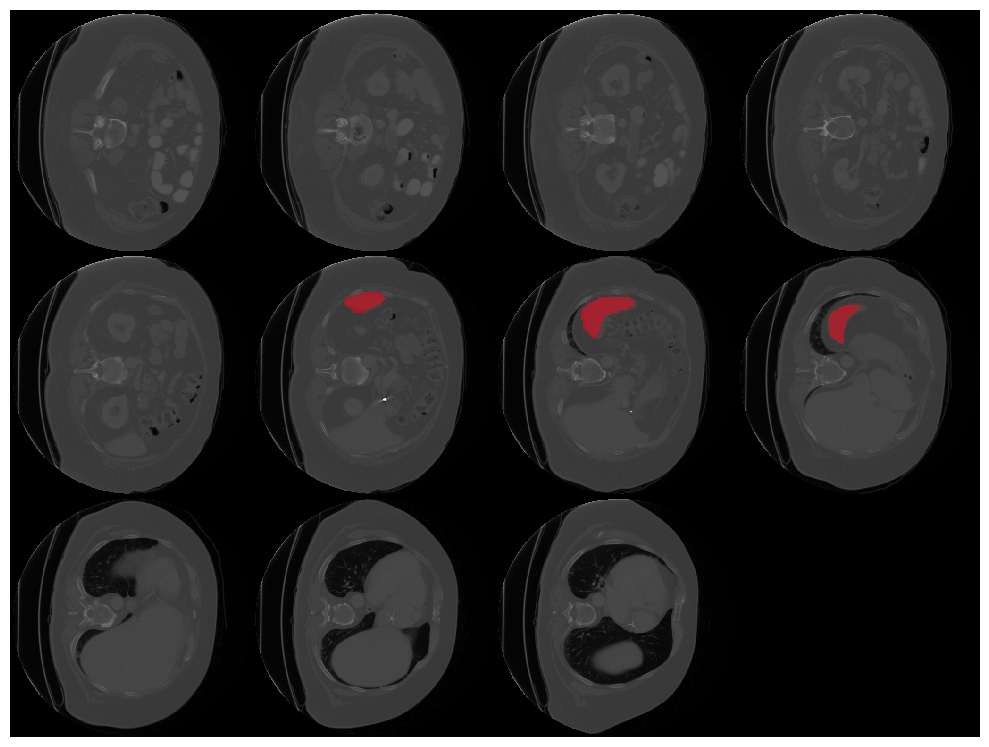

In [62]:
from monai.transforms import Invertd, LoadImaged

invert = fixMe

data["pred"] = data["label"]
inverted_data = invert(data)

orig_transform = Compose([fixMe])
orig_data = orig_transform(train_data_dicts[0])

ret = blend_images(image=orig_data["image"], label=inverted_data["pred"], alpha=0.5)
fig_im = matshow3d(ret, channel_dim=0, every_n=5, frame_dim=-1)


# Decollate batch

1. Create a post transform which inverts and saves the image and label in the input batch to the `Outputs/decollate` folder
2. Use the decollate batch to iterate over the batch files and apply the post transform
3. Load the saved data and display the images

In [72]:
from monai.data import Dataset, DataLoader, decollate_batch
from monai.transforms import SaveImaged

dataloader = DataLoader(Dataset(transform=preprocessing, data=train_data_dicts[:8]), batch_size=4)

postprocessing = Compose([fixMe])

for batch in dataloader:
    print(batch["image"].shape)
    data = [fixMe]


torch.Size([4, 1, 96, 96, 96])
2023-11-01 19:09:11,107 INFO image_writer.py:197 - writing: Outputs\decollate\spleen_10_label.nii.gz
2023-11-01 19:09:11,534 INFO image_writer.py:197 - writing: Outputs\decollate\spleen_10_image.nii.gz
2023-11-01 19:09:12,124 INFO image_writer.py:197 - writing: Outputs\decollate\spleen_12_label.nii.gz
2023-11-01 19:09:13,319 INFO image_writer.py:197 - writing: Outputs\decollate\spleen_12_image.nii.gz
2023-11-01 19:09:14,544 INFO image_writer.py:197 - writing: Outputs\decollate\spleen_13_label.nii.gz
2023-11-01 19:09:15,034 INFO image_writer.py:197 - writing: Outputs\decollate\spleen_13_image.nii.gz
2023-11-01 19:09:15,614 INFO image_writer.py:197 - writing: Outputs\decollate\spleen_14_label.nii.gz
2023-11-01 19:09:15,979 INFO image_writer.py:197 - writing: Outputs\decollate\spleen_14_image.nii.gz
torch.Size([4, 1, 96, 96, 96])
2023-11-01 19:09:20,384 INFO image_writer.py:197 - writing: Outputs\decollate\spleen_16_label.nii.gz
2023-11-01 19:09:20,844 INFO 

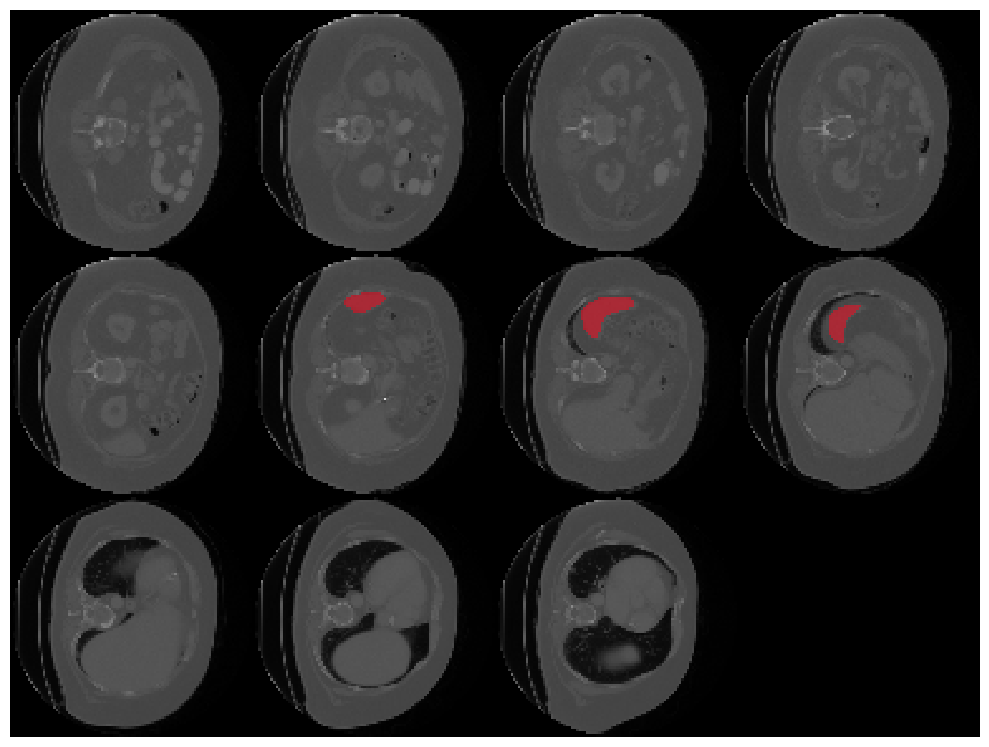

In [76]:
from pathlib import Path

images = fixMe
labels = fixMe

trans_dict = [{"image": image, "label": label} for image, label in zip(images, labels)]

trans = Compose([fixMe])
data = trans(trans_dict[0])

ret = blend_images(image=data["image"], label=data["label"], alpha=0.5)
fig_im = matshow3d(ret, channel_dim=0, every_n=5, frame_dim=-1)
